In [ ]:
!pip install boto3
import boto3
import pandas as pd
from io import BytesIO
import os
# Set the environment variables with your AWS credentials
os.environ['AWS_ACCESS_KEY_ID'] = 'your id'
os.environ['AWS_SECRET_ACCESS_KEY'] = 'your id'

# Create an S3 client
s3 = boto3.client('s3')

# Define the bucket and object key
bucket_name = 'standardbankbucket'
file_name = 'Lasthope.csv'

# Load the Excel file from S3 into a Pandas DataFrame
excel_file = s3.get_object(Bucket=bucket_name, Key=file_name)
df = pd.read_csv(BytesIO(excel_file['Body'].read()))

# Print the first 10 rows of the DataFrame
print(df.head(10))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached boto3-1.26.118-py3-none-any.whl (135 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 10.0 MB/s eta 0:00:00
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   
5  LP001011   Male     Yes          2      Graduate           Yes   
6  LP001013   Male     Yes          0  Not Graduate            No   
7  LP001014   Male     Yes         3+      Graduate            No   
8  LP001018   Male     Yes          2      Graduate            

In [ ]:
df.shape

(9210, 13)

In [ ]:
duplicates = df[df.duplicated()]

In [ ]:
df.shape

(9210, 13)

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
null_values_count = df['Gender'].isnull().sum()
print(null_values_count)

195


In [ ]:
null_values_count = df['Married'].isnull().sum()
print(null_values_count)

45


In [ ]:
null_values_count = df['Dependents'].isnull().sum()
print(null_values_count)

225


In [ ]:
null_values_count = df['Education'].isnull().sum()
print(null_values_count)

0


In [ ]:
null_values_count = df['Self_Employed'].isnull().sum()
print(null_values_count)

480


In [ ]:
null_values_count = df['ApplicantIncome'].isnull().sum()
print(null_values_count)

0


In [ ]:
null_values_count = df['CoapplicantIncome'].isnull().sum()
print(null_values_count)

0


In [ ]:
null_values_count = df['LoanAmount'].isnull().sum()
print(null_values_count)

330


In [ ]:
null_values_count = df['Loan_Amount_Term'].isnull().sum()
print(null_values_count)

210


In [ ]:
null_values_count = df['Credit_History'].isnull().sum()
print(null_values_count)

750


In [ ]:
null_values_count = df['Property_Area'].isnull().sum()
print(null_values_count)

0


In [ ]:
null_values_count = df['Loan_Status'].isnull().sum()
print(null_values_count)

0


In [ ]:
df = df.dropna()

In [ ]:
df.shape

(7200, 13)

In [ ]:
unique_count = df['Gender'].nunique()
unique_values = df['Gender'].unique()
print(unique_count)
print(unique_values)

2
['Male' 'Female']


In [ ]:
unique_count = df['Married'].nunique()
unique_values = df['Married'].unique()
print(unique_count)
print(unique_values)

2
['Yes' 'No']


In [ ]:
unique_count = df['Dependents'].nunique()
unique_values = df['Dependents'].unique()
print(unique_count)
print(unique_values)

4
['1' '0' '2' '3+']


In [ ]:
unique_count = df['Education'].nunique()
unique_values = df['Education'].unique()
print(unique_count)
print(unique_values)

2
['Graduate' 'Not Graduate']


In [ ]:
unique_count = df['Self_Employed'].nunique()
unique_values = df['Self_Employed'].unique()
print(unique_count)
print(unique_values)

2
['No' 'Yes']


In [ ]:
unique_count = df['ApplicantIncome'].nunique()
unique_values = df['ApplicantIncome'].unique()
print(unique_count)
print(unique_values)

405
[ 4583  3000  2583  6000  5417  2333  3036  4006 12841  3200  3073  1853
  1299  4950  3510  4887  7660  5955  2600  9560  2799  4226  1442  3167
  4692  3500 12500  3667  4166  3748  3600  1800  3941  5649  5821  2645
  4000  1928  3086  4230  4616 11500  2708  2132  3366  8080  3357  2500
  3029  2609  5726 10750  7100  4300  3208  1875  5266  3750  1000  3846
  1378  3988  2366  8566  5695  2958  6250  3273  4133  3620  2484  1977
  4188  1759  4288  4843  3052 11417  3800  2071  5316 14583  5568 10408
  2137  2957 10513  2014  2718  3459  4895  3316 14999  4200  5042  6950
  2698 11757  2330 14866  1538 10000  4860  6277  2577  9166  2281  3254
 39999  9538  1863  7933  3089  4167  9323  2439  2237  8000  3522  5708
  4344  3497  2045  5516  6400  4600 33846  3625 39147  2178  9328  4885
 12000  6033  3858  4191  3125  8333 11000  4923  3917  4408  3244  3975
  2479  3418  3430  7787  5703  3173  3850   150  3727  2221  4009  2971
  3250  2491  3155  5500  3812  3315  5819  251

In [ ]:
unique_count = df['CoapplicantIncome'].nunique()
unique_values = df['CoapplicantIncome'].unique()
print(unique_count)
print(unique_values)

232
[1.50800000e+03 0.00000000e+00 2.35800000e+03 4.19600000e+03
 1.51600000e+03 2.50400000e+03 1.52600000e+03 1.09680000e+04
 7.00000000e+02 8.10600000e+03 2.84000000e+03 1.08600000e+03
 5.62500000e+03 1.91100000e+03 2.25300000e+03 1.04000000e+03
 1.66700000e+03 3.00000000e+03 1.45900000e+03 7.21000000e+03
 1.66800000e+03 1.21300000e+03 2.33600000e+03 3.44000000e+03
 2.27500000e+03 1.64400000e+03 1.16700000e+03 1.59100000e+03
 2.20000000e+03 2.25000000e+03 2.85900000e+03 3.79600000e+03
 3.44900000e+03 4.59500000e+03 2.25400000e+03 3.06600000e+03
 1.87500000e+03 1.77400000e+03 4.75000000e+03 3.02200000e+03
 4.00000000e+03 1.88100000e+03 2.53100000e+03 2.11800000e+03
 4.16700000e+03 2.90000000e+03 5.65400000e+03 1.82000000e+03
 2.30200000e+03 9.97000000e+02 3.54100000e+03 3.26300000e+03
 3.80600000e+03 1.03000000e+03 1.12600000e+03 3.60000000e+03
 7.54000000e+02 2.28300000e+03 2.14200000e+03 8.98000000e+03
 2.01400000e+03 3.85000000e+03 1.92900000e+03 7.75000000e+03
 3.50000000e+03 1.43

In [ ]:
unique_count = df['LoanAmount'].nunique()
unique_values = df['LoanAmount'].unique()
print(unique_count)
print(unique_values)

186
[128.  66. 120. 141. 267.  95. 158. 168. 349.  70. 200. 114.  17. 125.
  76. 133. 104. 315. 116. 191. 122. 110.  35.  74. 106. 320. 144. 184.
  80.  47. 134.  44. 100. 112. 286.  97.  96. 135. 180.  99. 165. 258.
 126. 312. 136. 172.  81. 187. 113. 176. 111. 167.  50. 210. 175. 131.
 188.  25. 137. 115. 151. 225. 216.  94. 185. 154. 259. 194. 160. 102.
 290.  84.  88. 242. 129.  30. 118. 152. 244. 600. 255.  98. 275. 121.
  75.  63.  87. 101. 495.  73. 260. 108.  48. 164. 170.  83.  90. 166.
 124.  55.  59. 127. 214. 240. 130.  60. 280. 140. 155. 123. 201. 138.
 279. 192. 304. 150. 207. 436.  78.  54.  89. 139.  93. 132. 480.  56.
 300. 376.  67. 117.  71. 173.  46. 228. 308. 105. 236. 570. 380. 296.
 156. 109. 103.  45.  65.  53. 360.  62. 218. 178. 239. 143. 148. 149.
 153. 162. 230.  86. 234. 246. 500. 119. 107. 209. 208. 243.  40. 250.
 311. 400. 161. 324. 157. 145. 181.  26. 182. 211.   9. 186. 205.  36.
 146. 142. 496. 253.]


In [ ]:
df['LoanAmount'] = df['LoanAmount'].multiply(1000)

In [ ]:
unique_count = df['LoanAmount'].nunique()
unique_values = df['LoanAmount'].unique()
print(unique_count)
print(unique_values)

186
[128000.  66000. 120000. 141000. 267000.  95000. 158000. 168000. 349000.
  70000. 200000. 114000.  17000. 125000.  76000. 133000. 104000. 315000.
 116000. 191000. 122000. 110000.  35000.  74000. 106000. 320000. 144000.
 184000.  80000.  47000. 134000.  44000. 100000. 112000. 286000.  97000.
  96000. 135000. 180000.  99000. 165000. 258000. 126000. 312000. 136000.
 172000.  81000. 187000. 113000. 176000. 111000. 167000.  50000. 210000.
 175000. 131000. 188000.  25000. 137000. 115000. 151000. 225000. 216000.
  94000. 185000. 154000. 259000. 194000. 160000. 102000. 290000.  84000.
  88000. 242000. 129000.  30000. 118000. 152000. 244000. 600000. 255000.
  98000. 275000. 121000.  75000.  63000.  87000. 101000. 495000.  73000.
 260000. 108000.  48000. 164000. 170000.  83000.  90000. 166000. 124000.
  55000.  59000. 127000. 214000. 240000. 130000.  60000. 280000. 140000.
 155000. 123000. 201000. 138000. 279000. 192000. 304000. 150000. 207000.
 436000.  78000.  54000.  89000. 139000.  93000

In [ ]:
unique_count = df['Loan_Amount_Term'].nunique()
unique_values = df['Loan_Amount_Term'].unique()
print(unique_count)
print(unique_values)

9
[360. 120. 180.  60. 300. 480. 240.  36.  84.]


In [ ]:
unique_count = df['Credit_History'].nunique()
unique_values = df['Credit_History'].unique()
print(unique_count)
print(unique_values)

2
[1. 0.]


In [ ]:
unique_count = df['Property_Area'].nunique()
unique_values = df['Property_Area'].unique()
print(unique_count)
print(unique_values)

3
['Rural' 'Urban' 'Semiurban']


In [ ]:
unique_count = df['Loan_Status'].nunique()
unique_values = df['Loan_Status'].unique()
print(unique_count)
print(unique_values)

2
['N' 'Y']


In [ ]:
df.shape

(7200, 13)

In [ ]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,7200.000000,7200.000000,7200.000000,7200.00000,7200.000000
mean,5364.231250,1581.093583,144735.416667,342.05000,0.854167
std,5662.737003,2615.145696,80429.843418,65.14896,0.352964
min,150.000000,0.000000,9000.000000,36.00000,0.000000
25%,2898.750000,0.000000,100000.000000,360.00000,1.000000
50%,3859.000000,1084.500000,128000.000000,360.00000,1.000000
75%,5852.500000,2253.250000,170000.000000,360.00000,1.000000
max,81000.000000,33837.000000,600000.000000,480.00000,1.000000


In [ ]:
df['Gender'].value_counts()
df['Married'].value_counts()
df['Dependents'].value_counts()
df['Education'].value_counts()
df['Self_Employed'].value_counts()
df['Credit_History'].value_counts()
df['Property_Area'].value_counts()
df['Loan_Status'].value_counts()


Y    4980
N    2220
Name: Loan_Status, dtype: int64

In [ ]:
  #Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.metrics import mean_absolute_error, accuracy_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

import imblearn
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

#models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


#metrics
from imblearn.over_sampling import RandomOverSampler
from sklearn import metrics
from numpy import mean
from sklearn.utils import class_weight
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

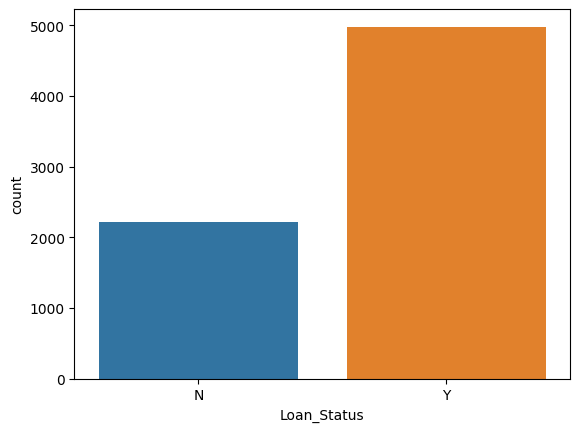

In [ ]:
sns.countplot(x='Loan_Status',data=df)
plt.show()

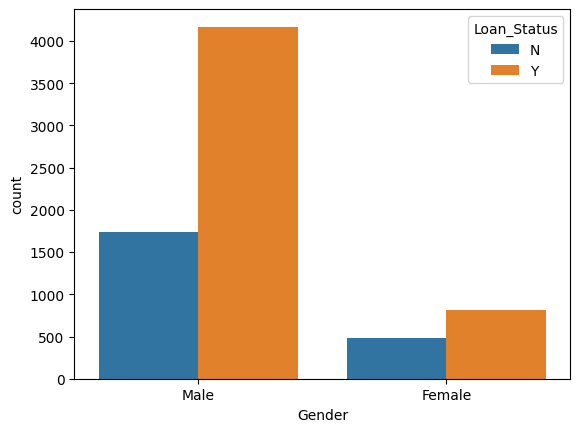

In [ ]:
sns.countplot(x='Gender', hue='Loan_Status', data=df)
plt.legend(title='Loan_Status')
plt.show()

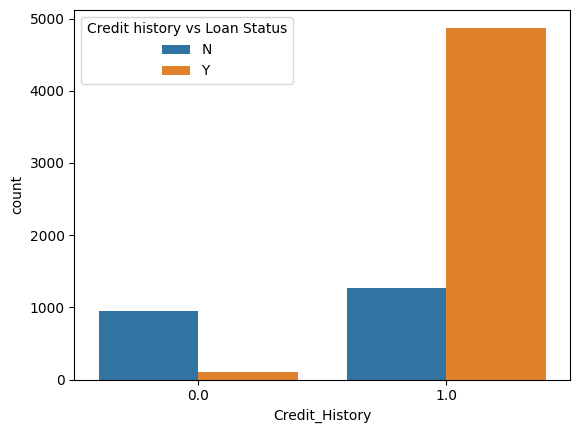

In [ ]:
sns.countplot(x='Credit_History', hue='Loan_Status', data=df)
plt.legend(title='Credit history vs Loan Status')

plt.show()

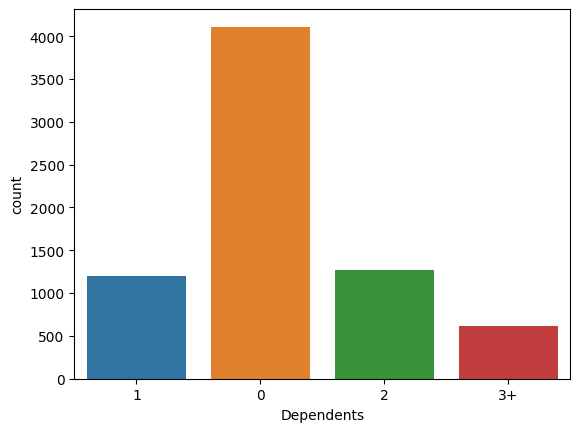

In [ ]:
sns.countplot(x='Dependents',data=df)
plt.show()

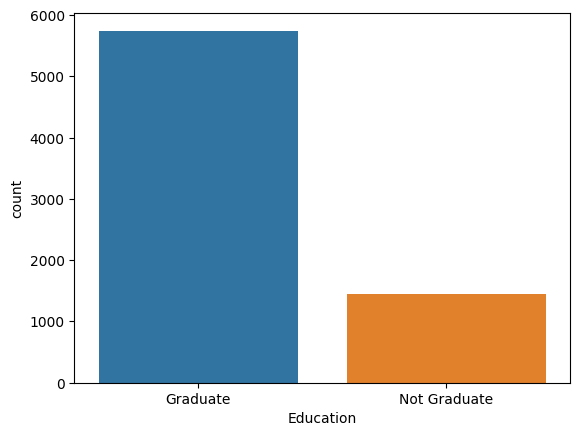

In [ ]:
sns.countplot(x='Education',data=df)
plt.show()

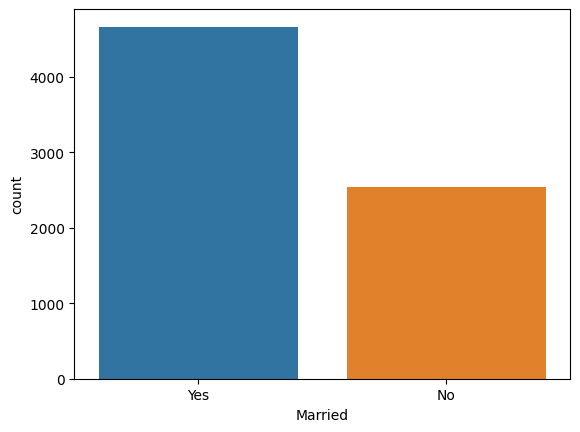

In [ ]:
sns.countplot(x='Married',data=df)
plt.show()

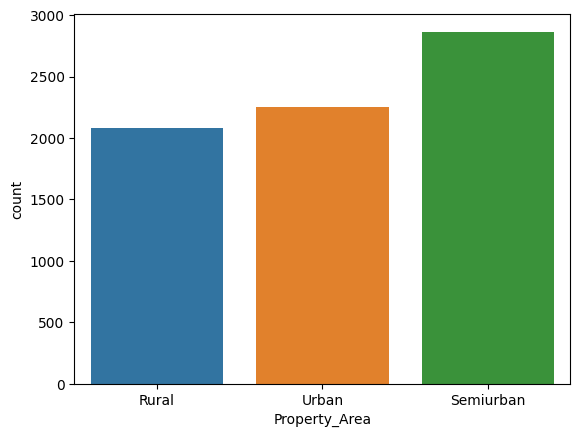

In [ ]:
sns.countplot(x='Property_Area',data=df)
plt.show()

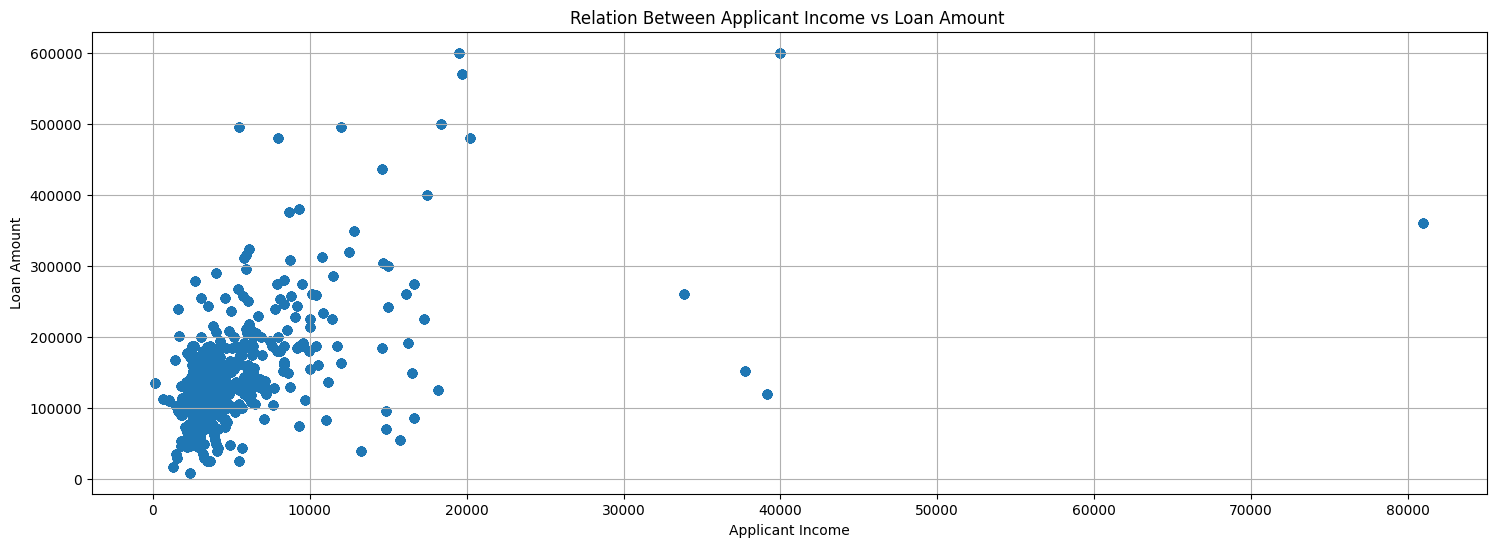

In [ ]:
plt.figure(figsize=(18, 6))
plt.title("Relation Between Applicant Income vs Loan Amount ")

plt.grid()
plt.scatter(df['ApplicantIncome'] , df['LoanAmount'])
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

In [ ]:
#As these features don't have any order relationship so we do onehot encoding
df = pd.get_dummies(df,columns = ['Property_Area','Gender','Married','Dependents','Education','Self_Employed'])
df.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,...,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes
1,LP001003,4583,1508.0,128000.0,360.0,1.0,N,1,0,0,...,0,1,0,1,0,0,1,0,1,0
2,LP001005,3000,0.0,66000.0,360.0,1.0,Y,0,0,1,...,0,1,1,0,0,0,1,0,0,1
3,LP001006,2583,2358.0,120000.0,360.0,1.0,Y,0,0,1,...,0,1,1,0,0,0,0,1,1,0
4,LP001008,6000,0.0,141000.0,360.0,1.0,Y,0,0,1,...,1,0,1,0,0,0,1,0,1,0
5,LP001011,5417,4196.0,267000.0,360.0,1.0,Y,0,0,1,...,0,1,0,0,1,0,1,0,0,1


In [ ]:
# Define Input and Target features

X = df.drop(['Loan_Status', 'Loan_ID'], axis=1)

y = df['Loan_Status']
# Spliting data for cross validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 20)


from sklearn.preprocessing import MinMaxScaler
scale = StandardScaler()
X_train_scaled=pd.DataFrame(scale.fit_transform(X_train),columns=X_train.columns)
X_test_scaled=pd.DataFrame(scale.fit_transform(X_test),columns=X_test.columns)
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape

((5040, 20), (2160, 20), (5040,), (2160,))

In [ ]:
# Check the balance of Target Value
origin = y.value_counts()
print(origin)

oversample = RandomOverSampler(sampling_strategy='minority')
X, y = oversample.fit_resample(X_train_scaled, y_train)
print(y.value_counts())


Y    4980
N    2220
Name: Loan_Status, dtype: int64
Y    3501
N    3501
Name: Loan_Status, dtype: int64


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_scaled,y_train)
pred_lr=lr.predict(X_test_scaled)
score_lr =accuracy_score(pred_lr,y_test)*100
score_lr

from sklearn.metrics import classification_report
cr = classification_report(y_test, pred_lr)
print(cr)


              precision    recall  f1-score   support

           N       0.90      0.43      0.58       681
           Y       0.79      0.98      0.87      1479

    accuracy                           0.81      2160
   macro avg       0.84      0.70      0.73      2160
weighted avg       0.82      0.81      0.78      2160



In [ ]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled,y_train)

# Cross validation -scaled
pred_dt=dt.predict(X_test_scaled)
score_dt =accuracy_score(pred_dt,y_test)*100
score_dt

from sklearn.metrics import classification_report
cr = classification_report(y_test, pred_dt)
print(cr)

              precision    recall  f1-score   support

           N       0.81      0.75      0.78       681
           Y       0.89      0.92      0.91      1479

    accuracy                           0.87      2160
   macro avg       0.85      0.84      0.84      2160
weighted avg       0.87      0.87      0.87      2160



In [ ]:
# Random forest classifier
rf = RandomForestClassifier(random_state = 55)
rf.fit(X_train_scaled,y_train)

pred_rf=rf.predict(X_test_scaled)
score_rf =accuracy_score(pred_rf,y_test)*100
score_rf

from sklearn.metrics import classification_report
cr = classification_report(y_test, pred_rf)
print(cr)

              precision    recall  f1-score   support

           N       1.00      0.90      0.95       681
           Y       0.96      1.00      0.98      1479

    accuracy                           0.97      2160
   macro avg       0.98      0.95      0.96      2160
weighted avg       0.97      0.97      0.97      2160



In [ ]:
import warnings
import pickle
warnings.filterwarnings("ignore")
pickle.dump(lr,open('model.pkl','wb') )

In [ ]:
pickle.dump(lr,open('model.pkl','wb') )